In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_2596\3584798568.py:4: RuntimeWarning: divide by zero encountered in divide
  y = x/(x*(x-1)/2)


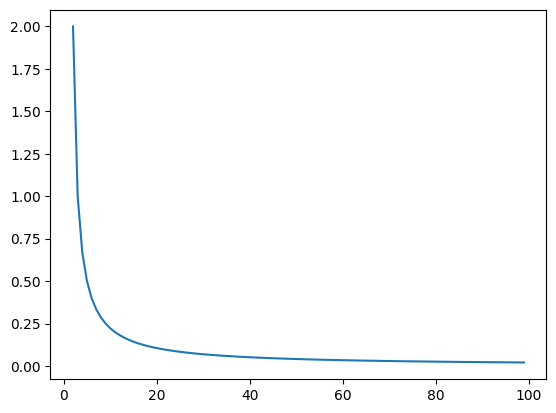

In [4]:
# plot a graph of the function y = x/(x*(x-1)/2)
x = np.arange(1, 100, 1)
y = x/(x*(x-1)/2)
plt.plot(x, y)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2596\594784881.py:3: RuntimeWarning: divide by zero encountered in divide
  y = x/(x*(x-1)/2)


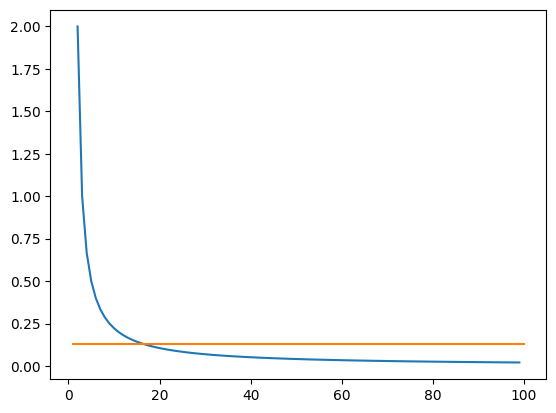

In [6]:
# get the x coordinate where y = 0.129
x = np.arange(1, 100, 1)
y = x/(x*(x-1)/2)
plt.plot(x, y)
plt.plot([1, 100], [0.129, 0.129])
plt.show()

In [7]:
# for grasp n < 16 seems to be good


In [8]:
# create graphs from 6 to 16, 1 of each

In [9]:
def graspGraph(n=10):
    val = n * 10
    x = np.zeros(n)
    y = np.random.randint(0, val, n)
    return np.array([x, y]).T

In [10]:
graspGraph(10)

array([[ 0., 55.],
       [ 0., 94.],
       [ 0., 53.],
       [ 0., 58.],
       [ 0., 79.],
       [ 0., 42.],
       [ 0., 81.],
       [ 0., 14.],
       [ 0., 27.],
       [ 0., 15.]])

In [11]:
def createTSP(size, num):
    points = graspGraph(size)
    with open(f'GRASP_{size}_{num}.tsp', 'w') as f:
        f.write(f'NAME: GRASP_{size}_{num}\n')
        f.write('TYPE: TSP\n')
        f.write(f'COMMENT: line_{size}_{num}\n')
        f.write(f'DIMENSION: {size}\n')
        f.write('EDGE_WEIGHT_TYPE: EUC_2D\n')
        f.write('NODE_COORD_SECTION\n')
        for i in range(size):
            f.write(f'{i+1} {points[i][0]} {points[i][1]}\n')

In [20]:
# random instances
def random_points(n):
    return np.random.randint(0,5000,(n,2))

In [21]:
def createTSP_random(size, num):
    points = random_points(size)
    with open(f'newdifficult/GRASP_{size}_{num}.tsp', 'w') as f:
        f.write(f'NAME: GRASP_{size}_{num}\n')
        f.write('TYPE: TSP\n')
        f.write(f'COMMENT: line_{size}_{num}\n')
        f.write(f'DIMENSION: {size}\n')
        f.write('EDGE_WEIGHT_TYPE: EUC_2D\n')
        f.write('NODE_COORD_SECTION\n')
        for i in range(size):
            f.write(f'{i+1} {points[i][0]} {points[i][1]}\n')

In [23]:
# create 20 to 100, 20 of each
for i in range(20, 101, 1):
    for j in range(20):
        createTSP_random(i, j)

In [24]:
import os


In [52]:
files = os.listdir('newdifficult')
files

['DBMEA_21_4.tsp',
 'DBMEA_22_1.tsp',
 'DBMEA_22_15.tsp',
 'DBMEA_25_2.tsp',
 'DBMEA_26_12.tsp',
 'DBMEA_27_12.tsp',
 'DBMEA_28_12.tsp',
 'DBMEA_28_15.tsp',
 'DBMEA_29_7.tsp',
 'DBMEA_31_18.tsp',
 'DBMEA_31_7.tsp',
 'DBMEA_34_4.tsp',
 'DBMEA_41_12.tsp',
 'DBMEA_41_14.tsp',
 'DBMEA_41_6.tsp',
 'DBMEA_41_8.tsp',
 'DBMEA_42_9.tsp',
 'DBMEA_43_1.tsp',
 'DBMEA_43_2.tsp',
 'DBMEA_44_12.tsp',
 'DBMEA_46_3.tsp',
 'DBMEA_46_5.tsp',
 'DBMEA_49_14.tsp',
 'DBMEA_50_14.tsp',
 'DBMEA_50_9.tsp',
 'DBMEA_53_0.tsp',
 'DBMEA_54_7.tsp',
 'DBMEA_58_19.tsp',
 'DBMEA_61_8.tsp',
 'DBMEA_62_17.tsp',
 'DBMEA_63_4.tsp',
 'DBMEA_64_18.tsp',
 'DBMEA_68_13.tsp',
 'DBMEA_71_4.tsp',
 'DBMEA_73_19.tsp',
 'DBMEA_74_13.tsp',
 'DBMEA_75_10.tsp',
 'DBMEA_76_10.tsp',
 'DBMEA_77_9.tsp',
 'DBMEA_83_14.tsp',
 'DBMEA_85_0.tsp',
 'DBMEA_85_11.tsp',
 'DBMEA_85_6.tsp',
 'DBMEA_87_15.tsp',
 'DBMEA_91_4.tsp',
 'DBMEA_93_14.tsp',
 'DBMEA_93_4.tsp',
 'DBMEA_95_11.tsp',
 'DBMEA_96_15.tsp',
 'DBMEA_96_4.tsp',
 'GILS_20_2.tsp',
 'GILS_

In [37]:
# for every file get betweenness and closeness


In [38]:
import networkx as nx
import pandas as pd
import tsplib95


In [39]:
for f in files:
    problem = tsplib95.load('newdifficult/' + f)
    graph = problem.get_graph()
    dist_matrix = nx.to_numpy_matrix(graph)
    dist_array = nx.to_numpy_array(graph)

    n = len(graph.nodes)
    m = len(graph.edges)

    edge_std = np.std(dist_matrix)

    between = nx.betweenness_centrality(graph, weight='weight')
    between_q75 = np.quantile(list(between.values()), 0.75)

    # closeness centrality statistics
    closeness = nx.closeness_centrality(graph, distance='weight')
    closeness_max = np.max(list(closeness.values()))

    if between_q75 <= 0.063 and edge_std <= 1185.434:
        # get the file name (e.g. GRASP_20_0.tsp) and rename it to DBMEA_20_0.tsp
        os.rename('newdifficult/' + f, 'newdifficult/DBMEA_' + f[6:])
    elif between_q75 <= 0.063 and edge_std > 1185.434:
        # rename to gils
        os.rename('newdifficult/' + f, 'newdifficult/GILS_' + f[6:])

    elif between_q75 <= 0.063:
        # get the file name (e.g. GRASP_20_0.tsp) and rename it to GILS_20_0.tsp
        os.rename('newdifficult/' + f, 'newdifficult/GILS_' + f[6:])



In [42]:
# get the number of files starting with DBMEA and GILS
dbmea = 0
gils = 0
for f in files:
    if f.startswith('DBMEA'):
        dbmea += 1
    elif f.startswith('GILS'):
        gils += 1

In [43]:
dbmea


74

In [44]:
gils

1543

In [49]:
# pick 50 random files from DBMEA and 50 from GILS
import random

In [45]:

dbmea_files = [f for f in files if f.startswith('DBMEA')]
gils_files = [f for f in files if f.startswith('GILS')]


In [46]:
dbmea_files

['DBMEA_21_4.tsp',
 'DBMEA_22_1.tsp',
 'DBMEA_22_15.tsp',
 'DBMEA_24_8.tsp',
 'DBMEA_25_2.tsp',
 'DBMEA_26_12.tsp',
 'DBMEA_27_12.tsp',
 'DBMEA_28_12.tsp',
 'DBMEA_28_15.tsp',
 'DBMEA_28_18.tsp',
 'DBMEA_29_7.tsp',
 'DBMEA_31_17.tsp',
 'DBMEA_31_18.tsp',
 'DBMEA_31_7.tsp',
 'DBMEA_33_16.tsp',
 'DBMEA_34_4.tsp',
 'DBMEA_34_5.tsp',
 'DBMEA_36_10.tsp',
 'DBMEA_36_16.tsp',
 'DBMEA_36_5.tsp',
 'DBMEA_41_12.tsp',
 'DBMEA_41_14.tsp',
 'DBMEA_41_6.tsp',
 'DBMEA_41_8.tsp',
 'DBMEA_42_5.tsp',
 'DBMEA_42_9.tsp',
 'DBMEA_43_1.tsp',
 'DBMEA_43_2.tsp',
 'DBMEA_44_12.tsp',
 'DBMEA_44_16.tsp',
 'DBMEA_46_3.tsp',
 'DBMEA_46_5.tsp',
 'DBMEA_49_14.tsp',
 'DBMEA_50_14.tsp',
 'DBMEA_50_2.tsp',
 'DBMEA_50_9.tsp',
 'DBMEA_51_3.tsp',
 'DBMEA_53_0.tsp',
 'DBMEA_54_7.tsp',
 'DBMEA_54_9.tsp',
 'DBMEA_58_19.tsp',
 'DBMEA_61_8.tsp',
 'DBMEA_62_17.tsp',
 'DBMEA_63_4.tsp',
 'DBMEA_64_13.tsp',
 'DBMEA_64_18.tsp',
 'DBMEA_68_13.tsp',
 'DBMEA_70_10.tsp',
 'DBMEA_71_4.tsp',
 'DBMEA_72_9.tsp',
 'DBMEA_73_19.tsp',
 'DBMEA

In [47]:
gils_files

['GILS_100_0.tsp',
 'GILS_100_1.tsp',
 'GILS_100_10.tsp',
 'GILS_100_11.tsp',
 'GILS_100_12.tsp',
 'GILS_100_13.tsp',
 'GILS_100_14.tsp',
 'GILS_100_15.tsp',
 'GILS_100_16.tsp',
 'GILS_100_17.tsp',
 'GILS_100_18.tsp',
 'GILS_100_19.tsp',
 'GILS_100_2.tsp',
 'GILS_100_3.tsp',
 'GILS_100_4.tsp',
 'GILS_100_5.tsp',
 'GILS_100_6.tsp',
 'GILS_100_7.tsp',
 'GILS_100_8.tsp',
 'GILS_100_9.tsp',
 'GILS_20_0.tsp',
 'GILS_20_1.tsp',
 'GILS_20_10.tsp',
 'GILS_20_11.tsp',
 'GILS_20_12.tsp',
 'GILS_20_13.tsp',
 'GILS_20_14.tsp',
 'GILS_20_15.tsp',
 'GILS_20_16.tsp',
 'GILS_20_17.tsp',
 'GILS_20_18.tsp',
 'GILS_20_19.tsp',
 'GILS_20_2.tsp',
 'GILS_20_3.tsp',
 'GILS_20_4.tsp',
 'GILS_20_6.tsp',
 'GILS_20_7.tsp',
 'GILS_20_8.tsp',
 'GILS_21_0.tsp',
 'GILS_21_1.tsp',
 'GILS_21_10.tsp',
 'GILS_21_11.tsp',
 'GILS_21_12.tsp',
 'GILS_21_13.tsp',
 'GILS_21_14.tsp',
 'GILS_21_15.tsp',
 'GILS_21_16.tsp',
 'GILS_21_17.tsp',
 'GILS_21_18.tsp',
 'GILS_21_19.tsp',
 'GILS_21_2.tsp',
 'GILS_21_3.tsp',
 'GILS_21_5.ts

In [50]:
dbmea_files = random.sample(dbmea_files, 50)
gils_files = random.sample(gils_files, 50)

In [53]:
# delete the rest of the files
for f in files:
    if f not in dbmea_files and f not in gils_files:
        os.remove('newdifficult/' + f)

In [54]:
os.listdir('newdifficult')

['DBMEA_21_4.tsp',
 'DBMEA_22_1.tsp',
 'DBMEA_22_15.tsp',
 'DBMEA_25_2.tsp',
 'DBMEA_26_12.tsp',
 'DBMEA_27_12.tsp',
 'DBMEA_28_12.tsp',
 'DBMEA_28_15.tsp',
 'DBMEA_29_7.tsp',
 'DBMEA_31_18.tsp',
 'DBMEA_31_7.tsp',
 'DBMEA_34_4.tsp',
 'DBMEA_41_12.tsp',
 'DBMEA_41_14.tsp',
 'DBMEA_41_6.tsp',
 'DBMEA_41_8.tsp',
 'DBMEA_42_9.tsp',
 'DBMEA_43_1.tsp',
 'DBMEA_43_2.tsp',
 'DBMEA_44_12.tsp',
 'DBMEA_46_3.tsp',
 'DBMEA_46_5.tsp',
 'DBMEA_49_14.tsp',
 'DBMEA_50_14.tsp',
 'DBMEA_50_9.tsp',
 'DBMEA_53_0.tsp',
 'DBMEA_54_7.tsp',
 'DBMEA_58_19.tsp',
 'DBMEA_61_8.tsp',
 'DBMEA_62_17.tsp',
 'DBMEA_63_4.tsp',
 'DBMEA_64_18.tsp',
 'DBMEA_68_13.tsp',
 'DBMEA_71_4.tsp',
 'DBMEA_73_19.tsp',
 'DBMEA_74_13.tsp',
 'DBMEA_75_10.tsp',
 'DBMEA_76_10.tsp',
 'DBMEA_77_9.tsp',
 'DBMEA_83_14.tsp',
 'DBMEA_85_0.tsp',
 'DBMEA_85_11.tsp',
 'DBMEA_85_6.tsp',
 'DBMEA_87_15.tsp',
 'DBMEA_91_4.tsp',
 'DBMEA_93_14.tsp',
 'DBMEA_93_4.tsp',
 'DBMEA_95_11.tsp',
 'DBMEA_96_15.tsp',
 'DBMEA_96_4.tsp',
 'GILS_20_2.tsp',
 'GILS_